In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


/tmp/ipykernel_372823/2171778720.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Year', palette='coolwarm')


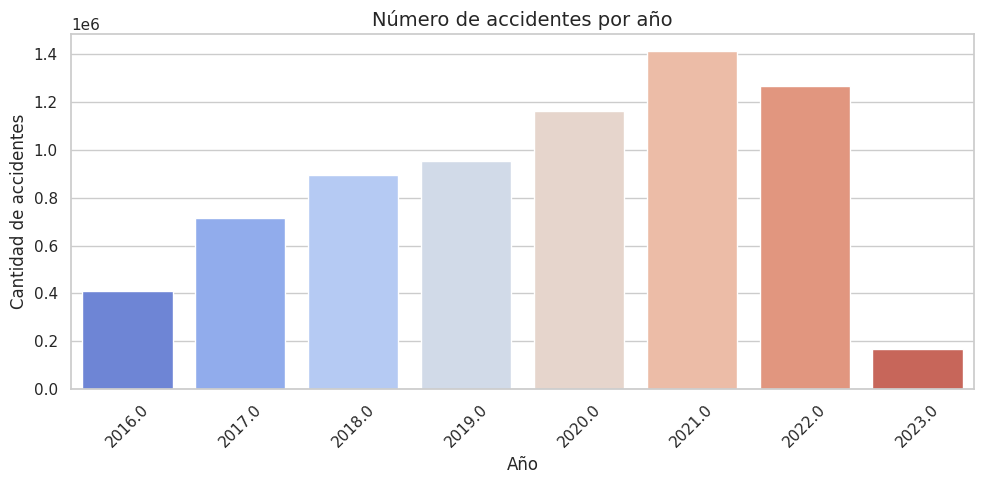

/tmp/ipykernel_372823/2171778720.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Month', data=df, palette='mako')


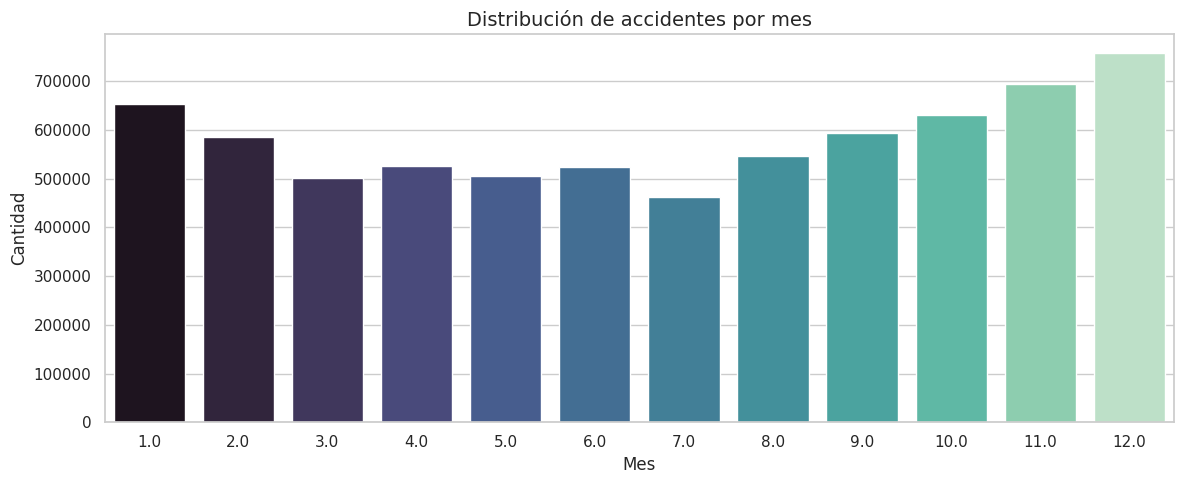

/tmp/ipykernel_372823/2171778720.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Estacion', data=df, order=['Primavera','Verano','Otoño','Invierno'], palette='rocket')


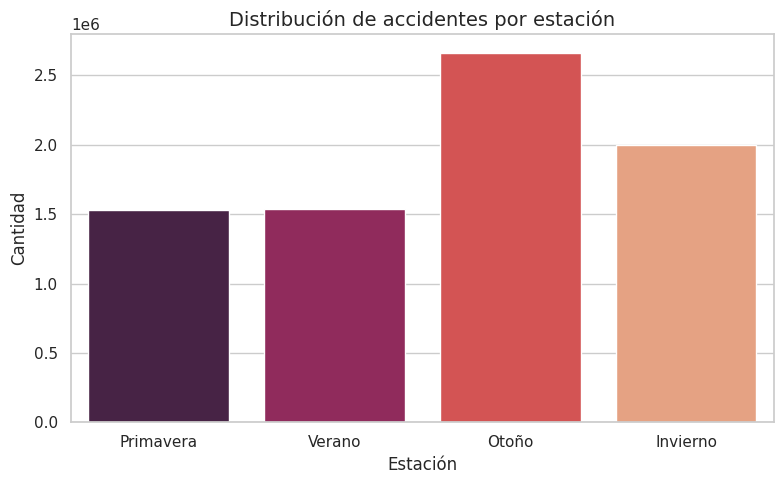

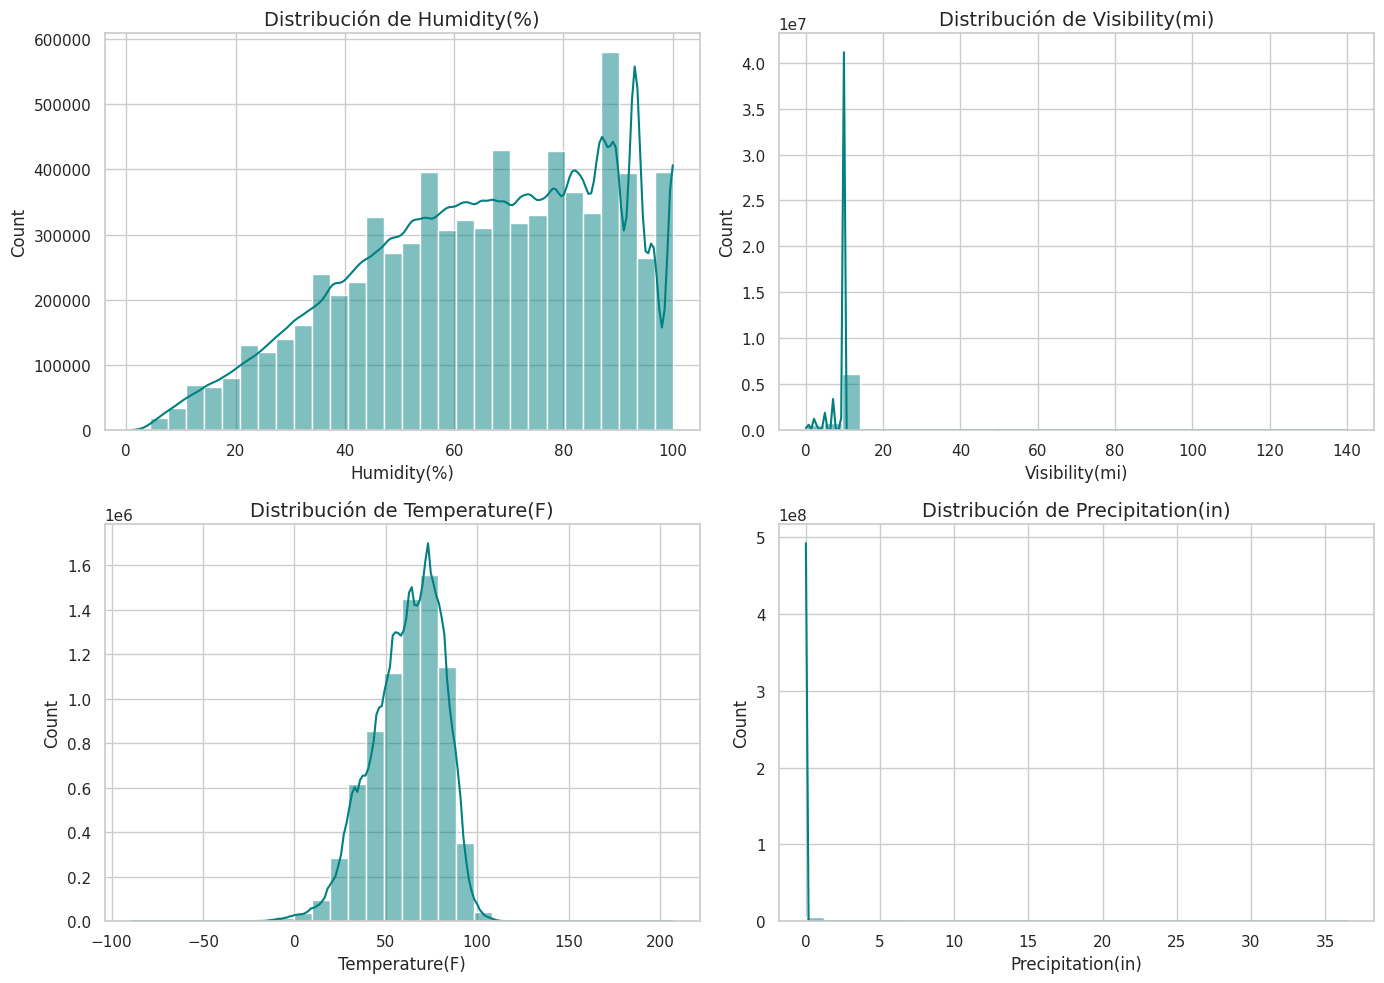

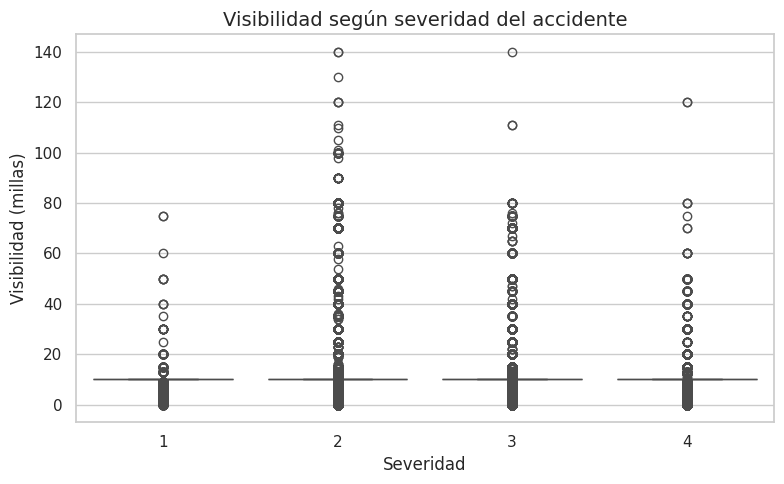

/tmp/ipykernel_372823/2171778720.py:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Weekday', data=df, order=dias, palette='Spectral')


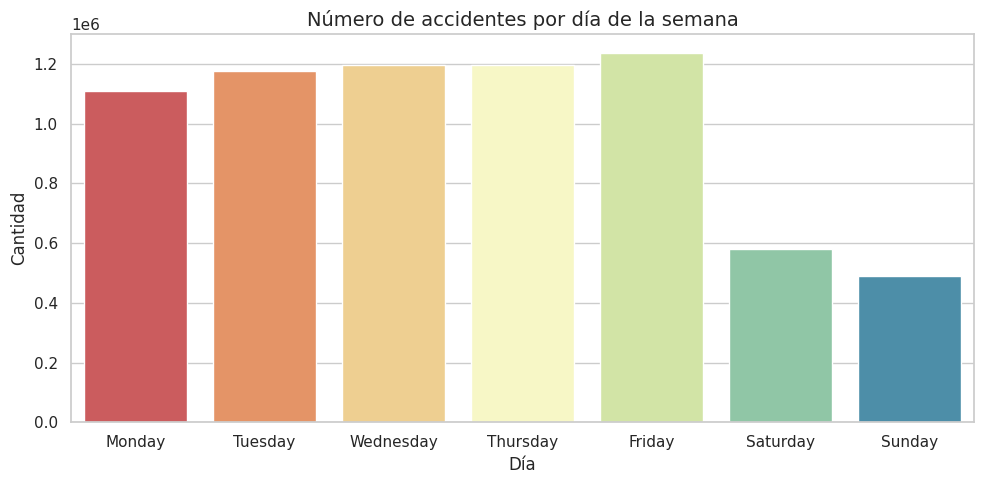

/tmp/ipykernel_372823/2171778720.py:97: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Hour', data=df, palette='flare')


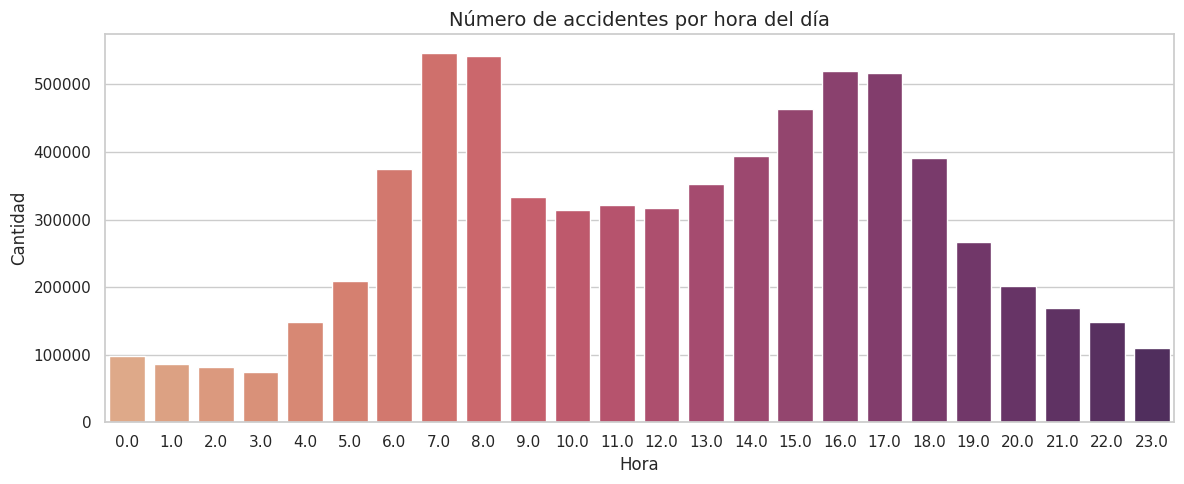

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración general
sns.set(style='whitegrid')
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14

# Carga del dataset
df = pd.read_csv('US_Accidents_March23.csv')

# Conversión de Start_Time a datetime
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')

# Columnas derivadas para análisis temporal
df['Year'] = df['Start_Time'].dt.year
df['Month'] = df['Start_Time'].dt.month
df['Weekday'] = df['Start_Time'].dt.day_name()
df['Hour'] = df['Start_Time'].dt.hour

# Función para determinar estación del año
def estacion(mes):
    if mes in [12,1,2]:
        return 'Invierno'
    elif mes in [3,4,5]:
        return 'Primavera'
    elif mes in [6,7,8]:
        return 'Verano'
    else:
        return 'Otoño'

df['Estacion'] = df['Month'].apply(estacion)

# ===== 1. Accidentes por año =====
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Year', palette='coolwarm')
plt.title('Número de accidentes por año')
plt.xlabel('Año')
plt.ylabel('Cantidad de accidentes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ===== 2. Accidentes por mes y estación =====
plt.figure(figsize=(12,5))
sns.countplot(x='Month', data=df, palette='mako')
plt.title('Distribución de accidentes por mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,5))
sns.countplot(x='Estacion', data=df, order=['Primavera','Verano','Otoño','Invierno'], palette='rocket')
plt.title('Distribución de accidentes por estación')
plt.xlabel('Estación')
plt.ylabel('Cantidad')
plt.tight_layout()
plt.show()

# ===== 3. Distribución de variables climáticas =====
clima_cols = ['Humidity(%)', 'Visibility(mi)', 'Temperature(F)', 'Precipitation(in)']
plt.figure(figsize=(14,10))
for i, col in enumerate(clima_cols, 1):
    plt.subplot(2,2,i)
    if col in df.columns:
        sns.histplot(df[col].dropna(), bins=30, kde=True, color='teal')
        plt.title(f'Distribución de {col}')
plt.tight_layout()
plt.show()

# ===== 4. Relación visibilidad vs severidad =====
if 'Severity' in df.columns and 'Visibility(mi)' in df.columns:
    plt.figure(figsize=(8,5))
    sns.boxplot(x='Severity', y='Visibility(mi)', data=df)
    plt.title('Visibilidad según severidad del accidente')
    plt.xlabel('Severidad')
    plt.ylabel('Visibilidad (millas)')
    plt.tight_layout()
    plt.show()
else:
    print("Faltan columnas 'Severity' o 'Visibility(mi)' para este análisis.")

# ===== 5. Accidentes por día de la semana =====
plt.figure(figsize=(10,5))
dias = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
sns.countplot(x='Weekday', data=df, order=dias, palette='Spectral')
plt.title('Número de accidentes por día de la semana')
plt.xlabel('Día')
plt.ylabel('Cantidad')
plt.tight_layout()
plt.show()

# ===== 6. Accidentes por hora del día =====
plt.figure(figsize=(12,5))
sns.countplot(x='Hour', data=df, palette='flare')
plt.title('Número de accidentes por hora del día')
plt.xlabel('Hora')
plt.ylabel('Cantidad')
plt.tight_layout()
plt.show()

# ===== 7. Evolución de variables climáticas clave =====
if all(col in df.columns for col in clima_cols):
    df['YearMonth'] = df['Start_Time'].dt.to_period('M')
    df_clima_evol = df.groupby('YearMonth')[clima_cols].mean().reset_index()
    df_clima_evol['YearMonth']


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Contar accidentes por año
accidentes_por_ano = df.groupBy('year').count().orderBy('year').toPandas()

plt.figure(figsize=(10,6))
sns.barplot(data=accidentes_por_ano, x='year', y='count', palette='viridis')
plt.title('Número de accidentes por año')
plt.xlabel('Año')
plt.ylabel('Cantidad de accidentes')
plt.xticks(rotation=45)
plt.show()
 

In [ ]:
from pyspark.sql.functions import month

df = df.withColumn('month', month('Start_Time'))

accidentes_por_mes = df.groupBy('month').count().orderBy('month').toPandas()

plt.figure(figsize=(10,6))
sns.lineplot(data=accidentes_por_mes, x='month', y='count', marker='o')
plt.title('Accidentes por mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de accidentes')
plt.xticks(range(1,13))
plt.show()


In [ ]:
clima_counts = df.groupBy('Weather_Condition').count().orderBy('count', ascending=False).limit(10).toPandas()

plt.figure(figsize=(12,6))
sns.barplot(data=clima_counts, y='Weather_Condition', x='count', palette='coolwarm')
plt.title('Top 10 condiciones climáticas en accidentes')
plt.xlabel('Número de accidentes')
plt.ylabel('Condición climática')
plt.show()


In [ ]:
from pyspark.sql.functions import dayofweek

df = df.withColumn('day_of_week', dayofweek('Start_Time'))

accidentes_por_dia = df.groupBy('day_of_week').count().orderBy('day_of_week').toPandas()

dias = ['Domingo', 'Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado']

plt.figure(figsize=(10,6))
sns.barplot(x=dias, y=accidentes_por_dia['count'], palette='magma')
plt.title('Accidentes por día de la semana')
plt.xlabel('Día de la semana')
plt.ylabel('Número de accidentes')
plt.show()


In [ ]:
from pyspark.sql.functions import hour

df = df.withColumn('hour', hour('Start_Time'))

accidentes_por_hora = df.groupBy('hour').count().orderBy('hour').toPandas()

plt.figure(figsize=(12,6))
sns.lineplot(x='hour', y='count', data=accidentes_por_hora, marker='o')
plt.title('Accidentes por hora del día')
plt.xlabel('Hora')
plt.ylabel('Número de accidentes')
plt.xticks(range(0,24))
plt.show()


In [ ]:
# Asumiendo df_clima contiene promedio diario de variables climáticas
plt.figure(figsize=(14,7))
for var in ['Temperature(F)', 'Humidity(%)', 'Visibility(mi)']:
    sns.lineplot(data=df_clima.toPandas(), x='date', y=var, label=var)

plt.title('Evolución de variables climáticas promedio diario')
plt.xlabel('Fecha')
plt.ylabel('Valor promedio')
plt.legend()
plt.show()
